# Data analysis, day 1, 30-01-2024


Dataset of crimes 2003-2028

## Exercise 1

- Go to https://datasf.org/opendata/
- Click on "Public Safety"
- You will notice that the SF crime data is divided into two periods. One from 2003 to May 2018 and one which is all of 2018 to the present. Today, to keep things easy, we will just work with the data from 2003 to 2018 (from January 1st 2003 to December 31st 2017 to be exact).
- Thus, you may simply download all police incidence reports, historical 2003 to may 2018. You can get everything as a big CSV file if you press the Export button (it's a snappy little ~500MB file).
- To get this thing into pandas, you can use the tips and tricks described here. If you want to try your luck without pandas, you can use the csv package to load the file.
- Now generate the following simple statistics


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

df = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")
df.head()


,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0


1) Report the total number of crimes in the dataset.

In [2]:
print(f"Total no. of crimes: {df.shape[0]:,}")

Total no. of crimes: 2,129,525


2) List the various categories of crime. How many are there?

In [3]:
cat_counts = df["Category"].value_counts()
len(cat_counts)


37

3) List the number of crimes in each category.

In [4]:
cat_counts

Category
LARCENY/THEFT                  477975
OTHER OFFENSES                 301874
NON-CRIMINAL                   236928
ASSAULT                        167042
VEHICLE THEFT                  126228
DRUG/NARCOTIC                  117821
VANDALISM                      114718
WARRANTS                        99821
BURGLARY                        91067
SUSPICIOUS OCC                  79087
ROBBERY                         54467
MISSING PERSON                  44268
FRAUD                           41348
FORGERY/COUNTERFEITING          22995
SECONDARY CODES                 22378
WEAPON LAWS                     21004
TRESPASS                        19194
PROSTITUTION                    16501
STOLEN PROPERTY                 11450
DISORDERLY CONDUCT               9932
DRUNKENNESS                      9760
SEX OFFENSES, FORCIBLE           8747
RECOVERED VEHICLE                8688
DRIVING UNDER THE INFLUENCE      5652
KIDNAPPING                       4282
ARSON                            3875
EMB

In order to do awesome predictive policing later on in the class, we're going to dissect the SF crime-data quite thoroughly to figure out what has been going on over the last years on the San Francisco crime scene.

## Exercise 2

The types of crimes. The first field we'll dig into is the column "Category".

- We have already counted the number of crimes in each category. What is the most commonly occurring category of crime? What is the least frequently occurring?

In [5]:
most_crime = df["Category"].value_counts().index.tolist()[0]
print(f"Most common crimes are in the category {most_crime.lower()}.")


Most common crimes are in the category larceny/theft.


In [6]:
least_crime = df["Category"].value_counts(ascending=True)
least_crime

Category
TREA                               14
SEX OFFENSES, NON FORCIBLE         43
PORNOGRAPHY/OBSCENE MAT            57
GAMBLING                          343
EXTORTION                         729
BRIBERY                           796
BAD CHECKS                        924
SUICIDE                          1291
LOITERING                        2402
LIQUOR LAWS                      2840
EMBEZZLEMENT                     2984
ARSON                            3875
KIDNAPPING                       4282
DRIVING UNDER THE INFLUENCE      5652
RECOVERED VEHICLE                8688
SEX OFFENSES, FORCIBLE           8747
DRUNKENNESS                      9760
DISORDERLY CONDUCT               9932
STOLEN PROPERTY                 11450
PROSTITUTION                    16501
TRESPASS                        19194
WEAPON LAWS                     21004
SECONDARY CODES                 22378
FORGERY/COUNTERFEITING          22995
FRAUD                           41348
MISSING PERSON                  44268
ROB

In [7]:
least_crime = df["Category"].value_counts(ascending=True).index.tolist()[0]
print(f"Least common crimes are of the type {least_crime.lower()}.")

Least common crimes are of the type trea.


Create a bar-plot over crime occurrences. 

This is a data visualization class, so here is the first essential lesson: **For a plot to be informative you need to label the axes** (The police chief will be furious if you forget). It can also be nice to other relevant pieces of info, title, labels, etc.). 

Mine looks like this (but yours doesn't have to look exactly like mine - the important thing is that you clearly communicate the information in the dataset).

In [8]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [9]:
import seaborn as sns
sns.set()

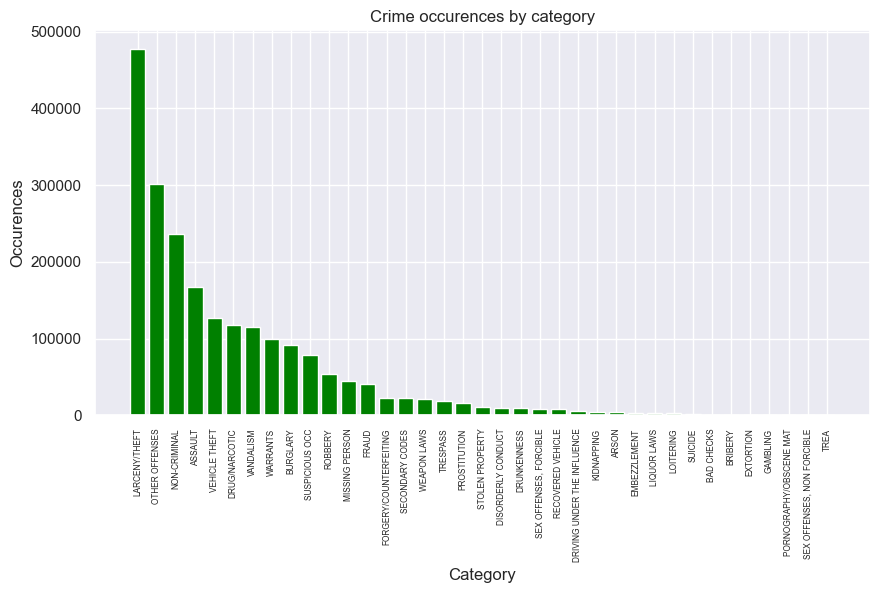

In [10]:
cats = df["Category"].value_counts().index.tolist()
occ = df["Category"].value_counts().tolist()

plt.rcParams["figure.figsize"] = (10, 5)
#plt.figsize(10,5)

plt.bar(cats, occ, color = 'green')
plt.title("Crime occurences by category")
plt.xlabel("Category")
plt.ylabel("Occurences")

plt.xticks(rotation=90, size=6)

plt.show()

In [11]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both',
    

The plot above already gives us a bit of information but does not tell us anything about how crimes changed over the years. Let's have a look at it!



## Exercise 3

Exercise 3: Temporal patterns.

To start off easily, let's count the number of crimes per year:

- What is the year with most crimes? 
- What is the year with the fewest crimes? (hint if your result is 2018, go back and see what I wrote about the date range up in exercise - 1).



In [12]:
crimes_per_year = pd.to_datetime(df["Date"]).dt.year.value_counts()
crimes_per_year

Date
2015    151459
2017    149487
2013    147664
2016    145994
2014    144844
2003    142803
2004    142054
2005    137048
2012    135464
2008    135242
2009    134309
2006    131856
2007    131771
2010    127758
2011    126713
2018     45059
Name: count, dtype: int64

In [13]:
year_most_crimes = crimes_per_year.idxmax()
print(f"The year with absolutely most crimes, is ... tadaaaa! --> {year_most_crimes}")

The year with absolutely most crimes, is ... tadaaaa! --> 2015


In [14]:
#year_most_crimes = crimes_per_year.index.tolist()[0]


In [15]:
year_least_crimes = crimes_per_year.idxmin()
print(f"The year with least crimes, is {year_least_crimes}.")

year_least_crimes1 = crimes_per_year.drop(labels=[2018]).idxmin()
print(f"But since only have data til May 2018, we will use the second-lowest value: {year_least_crimes1}.")

The year with least crimes, is 2018.
But since only have data til May 2018, we will use the second-lowest value: 2011.


*Note to self: Kan dette ikke skrives pænere? ^*

Jo. Brugt chatGPT Code Tutor til at hjælpe mig med dette.

Create a barplot of crimes-per-year (years on the -axis, crime-counts on the -axis).

In [16]:
crimes_per_year.index.tolist()

[2015,
 2017,
 2013,
 2016,
 2014,
 2003,
 2004,
 2005,
 2012,
 2008,
 2009,
 2006,
 2007,
 2010,
 2011,
 2018]

In [17]:
crimes_per_year.tolist()

[151459,
 149487,
 147664,
 145994,
 144844,
 142803,
 142054,
 137048,
 135464,
 135242,
 134309,
 131856,
 131771,
 127758,
 126713,
 45059]

In [20]:
years = crimes_per_year.index.tolist()
occ_pr_year = crimes_per_year.tolist()
#Kan jeg fjerne alle occurences med year 2018?

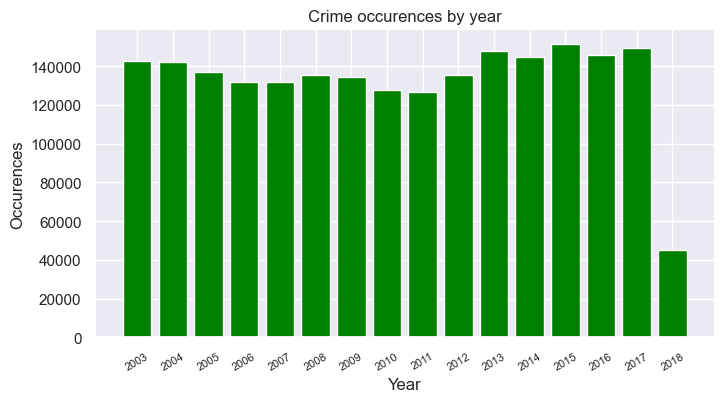

In [21]:
plt.rcParams["figure.figsize"] = (8, 4)
#plt.figsize(10,5)

plt.bar(years, occ_pr_year, color = 'green')
plt.title("Crime occurences by year")
plt.xlabel("Year")
plt.ylabel("Occurences")

plt.xticks(years, rotation=30, size=8)

plt.show()

- Finally, Police chief Suneman is interested in the temporal development of only a subset of categories, the so-called *focus crimes*. Those categories are listed below (for convenient copy-paste action). Create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.

In [23]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

mask = df["Category"].isin(focuscrimes)
df_focused = df[mask]
df_focused.head()

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
5,13027069804134,130270698,4134,ASSAULT,BATTERY,Tuesday,04/02/2013,15:50,TARAVAL,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,44.0


In [24]:
df["Category"]

0                 ROBBERY
1           VEHICLE THEFT
2           VEHICLE THEFT
3                   ARSON
4                 ASSAULT
                ...      
2129520     DRUG/NARCOTIC
2129521           ASSAULT
2129522    OTHER OFFENSES
2129523    OTHER OFFENSES
2129524         VANDALISM
Name: Category, Length: 2129525, dtype: object

In [25]:
focus_df = df[df["Category"].isin(focuscrimes)]
focus_df

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
5,13027069804134,130270698,4134,ASSAULT,BATTERY,Tuesday,04/02/2013,15:50,TARAVAL,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129515,17080890805011,170808908,5011,BURGLARY,"BURGLARY OF APARTMENT HOUSE, FORCIBLE ENTRY",Monday,10/02/2017,21:00,SOUTHERN,NONE,...,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,32.0
2129517,16026805516710,160268055,16710,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Friday,04/01/2016,10:36,NORTHERN,"ARREST, BOOKED",...,NaN,NaN,NaN,10.0,2.0,NaN,NaN,NaN,NaN,50.0
2129520,17050730416710,170507304,16710,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Thursday,06/22/2017,01:42,CENTRAL,"ARREST, CITED",...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,77.0
2129521,17071435504014,170714355,4014,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,09/01/2017,17:00,PARK,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,112.0


In [26]:
focus_df["Category"].value_counts()

Category
LARCENY/THEFT                  477975
ASSAULT                        167042
VEHICLE THEFT                  126228
DRUG/NARCOTIC                  117821
VANDALISM                      114718
BURGLARY                        91067
ROBBERY                         54467
WEAPON LAWS                     21004
TRESPASS                        19194
PROSTITUTION                    16501
STOLEN PROPERTY                 11450
DISORDERLY CONDUCT               9932
DRUNKENNESS                      9760
DRIVING UNDER THE INFLUENCE      5652
Name: count, dtype: int64

In [27]:
crime_data = {}
for crime in focuscrimes:
    crime_per_year = pd.to_datetime(focus_df[focus_df["Category"] == crime]["Date"]).dt.year.value_counts().sort_index()
#    print(crime, crime_per_year)
    crime_data[crime] = crime_per_year

crime_data

{'LARCENY/THEFT': Date
 2003    26185
 2004    24337
 2005    25226
 2006    27227
 2007    25599
 2008    25636
 2009    25419
 2010    24212
 2011    25629
 2012    30760
 2013    36216
 2014    37860
 2015    41980
 2016    40365
 2017    47714
 2018    13610
 Name: count, dtype: int64,
 'ASSAULT': Date
 2003    11409
 2004    10968
 2005    10154
 2006    10779
 2007    10900
 2008    11063
 2009    10681
 2010    10659
 2011    10589
 2012    10519
 2013    10790
 2014    10398
 2015    11090
 2016    11546
 2017    11613
 2018     3884
 Name: count, dtype: int64,
 'DRUG/NARCOTIC': Date
 2003     9784
 2004     9792
 2005     8444
 2006     8943
 2007    10360
 2008    11456
 2009    11771
 2010     9036
 2011     6802
 2012     6307
 2013     6672
 2014     5324
 2015     4194
 2016     4202
 2017     3265
 2018     1469
 Name: count, dtype: int64,
 'VANDALISM': Date
 2003    6377
 2004    6427
 2005    6963
 2006    7599
 2007    7452
 2008    7234
 2009    7510
 2010    7743
 2

In [28]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

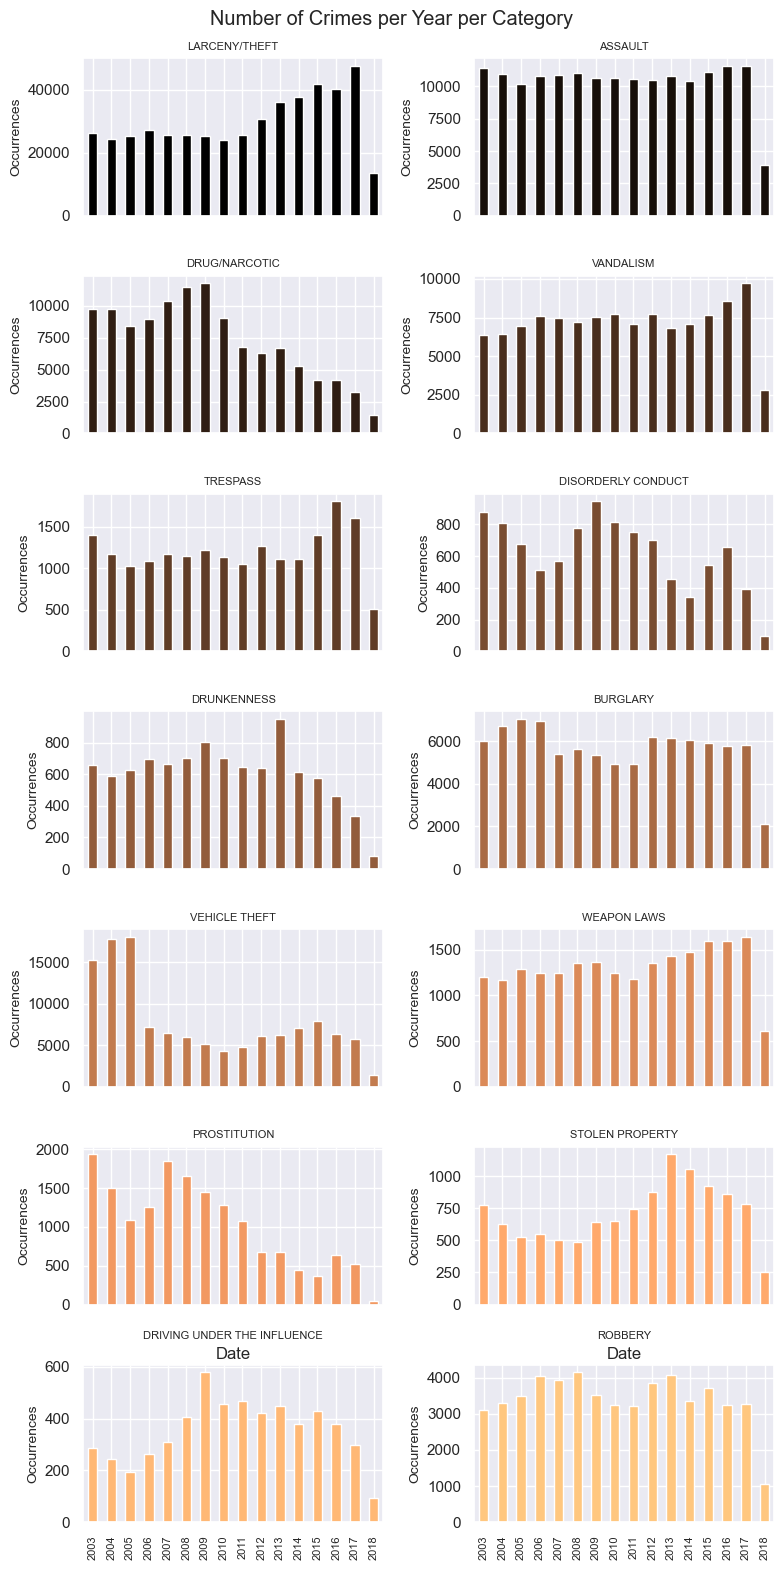

In [29]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#define subplot layout - 14 crime categories
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(8, 16)) # Adjust figsize as needed
fig.suptitle("Number of Crimes per Year per Category")

plt.title("No. of crimes per year per category")

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Number of plots
num_plots = len(crime_data)

# Create a colormap
# Matplotlib has several built-in colormaps like viridis, plasma, inferno, magma, etc.
colors = cm.copper(np.linspace(0, 1, num_plots))

for ax, color, (crime, data) in zip(axes, colors, crime_data.items()):
#    print(crime_data[crime])
    data.plot(kind='bar', ax=ax, color=color)
    ax.set_title(crime, size=8)
    ax.set_ylabel('Occurrences', size=10)
    ax.xaxis.set_label_position('top')

for i, ax in enumerate(axes):
# For all but the last row
    if i < 12:  # 12 is the index of the first plot in the last row (7 * 2 - 2)
        ax.set_xticklabels([])  # Hide x-axis labels
        ax.set_xlabel('')
    else:
        for label in ax.get_xticklabels():
            label.set_fontsize(8)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.95) # Adjust as needed for the main title
plt.show()


### Comment on at least three interesting trends in plots:

1. Theft is growing since 2012
2. But at the same time, drugs have been dropping since 2009
3. Prostitution has been dropping steadily since 2007, until 2016-2017 where it got a revival
4. Assault seems pretty steady all the years
5. Is vandalism going to be a growing problem in the last few years?
